# Tools
* **Google Colab**: to share nootbooks easly and avoid configuration problems
* **Scikit Learn**: Simple and efficient tools for predictive data analysis



# Implementation

In [86]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Get Dataset
Download dataset from Github

In [87]:
def get_dataset(url):
  dataset = pd.read_csv(url, sep=';', header=None)
  # print(dataset.head())
  return dataset
label_column = 14

## Data preprocessing
Preparing data for Scikit Learn

### Transform data for sckit learn
Scikit does not support handling for categorical data, it is necessary to convert categorical features to a numerical representation

In [88]:
def transform_data(data, le, fit=False):
  categorical_cols = list(set(data.columns) - set(data._get_numeric_data().columns))
  len_cols = len(categorical_cols)
  for i in range(len_cols):
      cl = categorical_cols[i]
      if fit:
        data[cl] = le[cl].fit_transform(data[cl]) 
      else:
        data[cl] = le[cl].transform(data[cl]) 

  return data

### Split features and label

In [89]:
def split_data(data):
  y = data[label_column]
  X = data.drop([label_column], axis=1)

  return(X, y)

## Train
Two methods were chosen, K-Nearest Neighbors (KNN) and Random Forest (RF), as both are very popular

Set parameters is a bit tricky, it's most experience and a lot of *Trial-and-error*. 


RF Parameters
- min_samples_leaf : guarantees a minimum number of samples in every leaf. At least 3 it's recomended to avoid outliers leaf. This control the tree depth, because nodes are expanded until all leaves contain less than min_samples_split samples
- n_estimators: The number of trees in the forest, collect and orginze the sample widely
- min_samples_split: To split a node at least 5 samples are needed. Does not allow each sample to be a branch.
```
parameters_rf = {
              'min_samples_leaf': 3, # The minimum number of samples required to be at a leaf node. 
              'n_estimators': 20, # The number of trees in the forest. High numb
              'min_samples_split': 5,}
```

KNN Parameters
Look for 5 nearest Neighbors, is recomended to use a prime number. 
```
parameters_knn = {
      'n_neighbors' : 5
  }
```



Classifier: Random Forest


Confusion matrix, without normalization
[[15517   359]
 [ 1243  3665]]
-------------------------------
Normalized confusion matrix
[[0.97738725 0.02261275]
 [0.25325998 0.74674002]]
-------------------------------


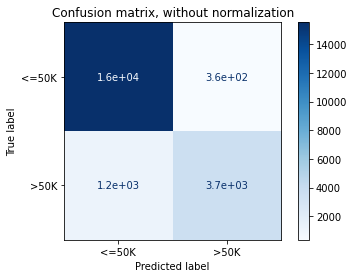

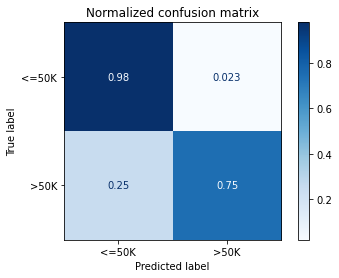


Random Forest Accuracy: 0.8695631254811393


-------------


Classifier: Nearest Neighbors


Confusion matrix, without normalization
[[15117   759]
 [ 2515  2393]]
-------------------------------
Normalized confusion matrix
[[0.95219199 0.04780801]
 [0.51242869 0.48757131]]
-------------------------------


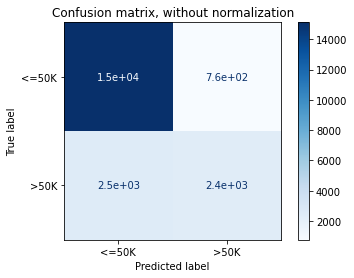

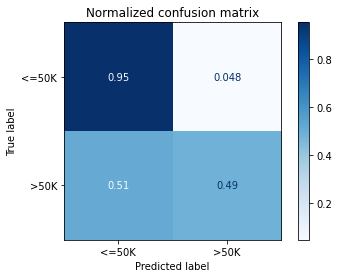


Nearest Neighbors Accuracy: 0.7771362586605081


-------------




In [90]:
def train_scikit():
  dataset = get_dataset(url = 'https://raw.githubusercontent.com/rfmorera/Font10-Test/master/adultoclase-2.csv')

  label_encoders = [preprocessing.LabelEncoder() for i in range(len(dataset.columns))]
  data = transform_data(dataset, label_encoders, fit=True)

  (train_X, train_y) = split_data(data)

  names = ["Random Forest", "Nearest Neighbors"]
  
  parameters_rf = {
              'min_samples_leaf': 3,
              'n_estimators': 20, 
              'min_samples_split': 5,
              }

  parameters_knn = {
      'n_neighbors' : 5
  }

  classifiers = [
                RandomForestClassifier(**parameters_rf),
                KNeighborsClassifier(**parameters_knn)
  ]

  class_names = label_encoders[label_column].classes_
  titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

  for name, clf in zip(names, classifiers):

    clf.fit(train_X, train_y)
    predictions = cross_val_predict(clf, train_X, train_y, cv=8)

    print("Classifier: {0}\n\n".format(name))
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, train_X, train_y,
                                    display_labels=class_names,
                                    cmap=plt.cm.Blues,
                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)
        print("-------------------------------")

    plt.show()
    score = accuracy_score(train_y ,predictions)
    print("\n{0} Accuracy: {1}".format(name, score))
    print("\n\n-------------\n\n")

  return (classifiers, label_encoders)

([RF_model, KNN_model], label_encoders) = train_scikit()

## Prediction
Test purpose. Takes raw data transform it and evaluate in **cls** model. Finally decode the label (from numerical to categorical)

In [91]:
def predict_scikit(model, label_encoders, to_predict):
  data = transform_data(to_predict, label_encoders, fit=False)
  predc = model.predict(data)
  return label_encoders[label_column].inverse_transform(predc)

# Example of use


In [92]:
target = pd.DataFrame([[39,"State-gov",77516,"Bachelors",13,"Never-married","Adm-clerical","Not-in-family","White","Male",2174,0,40,"United-States"],
                       [37,"Private",280464,"Masters",13,"Married-civ-spouse","Exec-managerial","Husband","Black","Male",5178,0,80,"United-States"]])


prediction = predict_scikit(RF_model, label_encoders, target)
print(prediction)
prediction = predict_scikit(KNN_model, label_encoders, target)
print(prediction)

['<=50K' '>50K']
['<=50K' '<=50K']
